# Evaluation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy
from scipy.stats import ks_2samp
import seaborn as sns
import matplotlib.dates as mdates
np.set_printoptions(suppress=True)

In [2]:
returns_test = pd.read_csv('data/returns_test.csv', index_col=0)
returns_test['type'] = 'real'
returns_test.corr()

,brent,crude,gasoline,heating,gas,natural
brent,1.000000,0.448360,0.553440,0.844944,0.690006,0.111087
crude,0.448360,1.000000,0.288894,0.400785,0.331081,-0.041827
gasoline,0.553440,0.288894,1.000000,0.547840,0.364071,0.120775
heating,0.844944,0.400785,0.547840,1.000000,0.763319,0.182472
gas,0.690006,0.331081,0.364071,0.763319,1.000000,0.139762
natural,0.111087,-0.041827,0.120775,0.182472,0.139762,1.000000


In [3]:
gen_t_copula = pd.read_csv('data/gen_t_copula.csv', index_col=0)
gen_t_copula['type'] = 't_copula'
gen_t_copula.corr()

,brent,crude,gasoline,heating,gas,natural
brent,1.000000,0.852484,0.726298,0.852165,0.656464,0.181653
crude,0.852484,1.000000,0.618484,0.744001,0.576149,0.169473
gasoline,0.726298,0.618484,1.000000,0.592361,0.527207,0.162037
heating,0.852165,0.744001,0.592361,1.000000,0.632463,0.211249
gas,0.656464,0.576149,0.527207,0.632463,1.000000,0.152165
natural,0.181653,0.169473,0.162037,0.211249,0.152165,1.000000


In [4]:
gen_t_copulaKDE = pd.read_csv('data/gen_t_copulaKDE.csv', index_col=0)
gen_t_copulaKDE['type'] = 't_copulaKDE'
gen_t_copulaKDE.corr()

,brent,crude,gasoline,heating,gas,natural
brent,1.000000,0.855330,0.706689,0.865960,0.625819,0.181656
crude,0.855330,1.000000,0.633157,0.758610,0.564247,0.177443
gasoline,0.706689,0.633157,1.000000,0.650946,0.470341,0.170815
heating,0.865960,0.758610,0.650946,1.000000,0.635395,0.206004
gas,0.625819,0.564247,0.470341,0.635395,1.000000,0.130661
natural,0.181656,0.177443,0.170815,0.206004,0.130661,1.000000


In [5]:
gen_gbm = pd.read_csv('data/gen_gbm.csv', index_col=0)
gen_gbm['type'] = 'GBM'
gen_gbm.corr()

,brent,crude,gasoline,heating,gas,natural
brent,1.000000,0.866131,0.752598,0.880242,0.644880,0.207722
crude,0.866131,1.000000,0.681445,0.787721,0.583232,0.209827
gasoline,0.752598,0.681445,1.000000,0.705232,0.483430,0.164808
heating,0.880242,0.787721,0.705232,1.000000,0.658731,0.217602
gas,0.644880,0.583232,0.483430,0.658731,1.000000,0.126739
natural,0.207722,0.209827,0.164808,0.217602,0.126739,1.000000


In [6]:
gen_tgan = pd.read_csv('data/gen_tgan.csv', index_col=0)
gen_tgan['type'] = 'tgan'
gen_tgan.corr()

,brent,crude,gasoline,heating,gas,natural
brent,1.000000,0.829463,0.730697,0.838497,0.615977,0.202764
crude,0.829463,1.000000,0.675291,0.757584,0.571328,0.205073
gasoline,0.730697,0.675291,1.000000,0.705998,0.506422,0.182264
heating,0.838497,0.757584,0.705998,1.000000,0.630973,0.202218
gas,0.615977,0.571328,0.506422,0.630973,1.000000,0.133013
natural,0.202764,0.205073,0.182264,0.202218,0.133013,1.000000


## Price paths

In [7]:
prices = pd.read_csv('data/prices.csv', index_col=0)
prices.index = pd.to_datetime(prices.index)
start_price = prices.iloc[2432]
start_price

brent        55.4900
crude        52.4200
gasoline      1.5702
heating       1.6459
gas         489.5000
natural       3.2040
Name: 2017-01-22 00:00:00, dtype: float64

In [8]:
real_prices = [start_price.brent]
for r in returns_test.brent:
    real_prices.append(real_prices[-1] + r*real_prices[-1])

In [9]:
def plot_path(gen_set): 
    fig, ax = plt.subplots(figsize=(7, 4))
    i_space = np.arange(0, len(gen_set.brent), 1043)
    for i in i_space:
        gbm_prices = [start_price.brent]
        for r in gen_set.brent.iloc[i:i+1043]:
            gbm_prices.append(gbm_prices[-1] + r*gbm_prices[-1])
        ax.plot(prices.index[-len(gbm_prices):], gbm_prices, c='tab:blue', alpha=0.3)
    ax.plot(prices.index[-len(real_prices):], real_prices)

    fig.autofmt_xdate()
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
    plt.ylim(-50, 200)

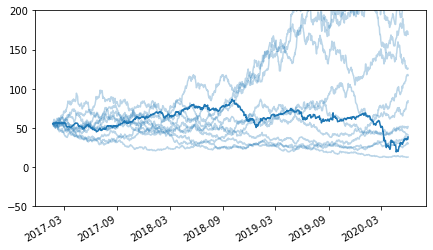

In [10]:
plot_path(gen_gbm)
plt.savefig('figs/path_gbm.png')
plt.show()

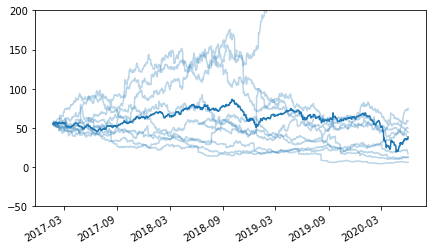

In [11]:
plot_path(gen_t_copula)
plt.savefig('figs/path_t_copula.png')
plt.show()

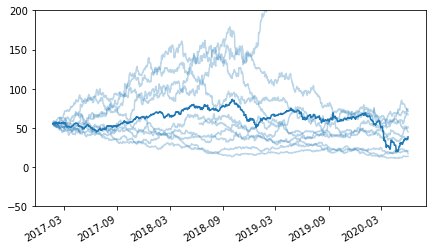

In [12]:
plot_path(gen_t_copulaKDE)
plt.savefig('figs/path_t_copulaKDE.png')
plt.show()

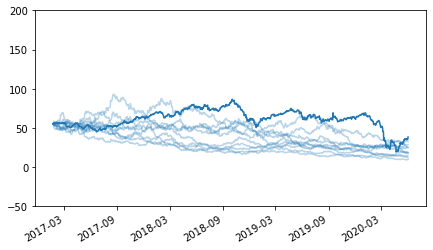

In [13]:
plot_path(gen_tgan)
plt.savefig('figs/path_tgan.png')
plt.show()

## Distribution

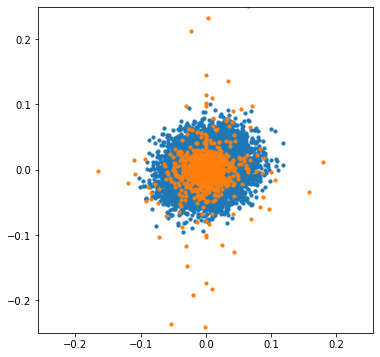

In [14]:
plt.figure(figsize=(6, 6))
plt.scatter(gen_gbm.natural, gen_gbm.gasoline, s=10)
plt.scatter(returns_test.natural, returns_test.gasoline, s=10)
plt.axis('equal')
plt.xlim(-0.25, 0.25)
plt.ylim(-0.25, 0.25)
plt.savefig('figs/gen_gbm.png')
plt.show()

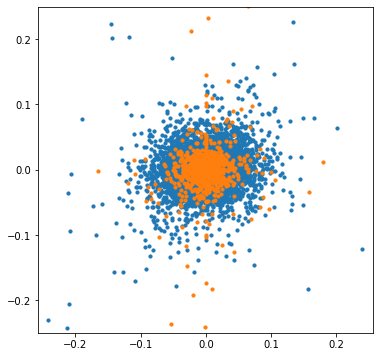

In [15]:
plt.figure(figsize=(6, 6))
plt.scatter(gen_t_copula.natural, gen_t_copula.gasoline, s=10)
plt.scatter(returns_test.natural, returns_test.gasoline, s=10)
plt.axis('equal')
plt.xlim(-0.25, 0.25)
plt.ylim(-0.25, 0.25)
plt.savefig('figs/gen_t_copula.png')
plt.show()

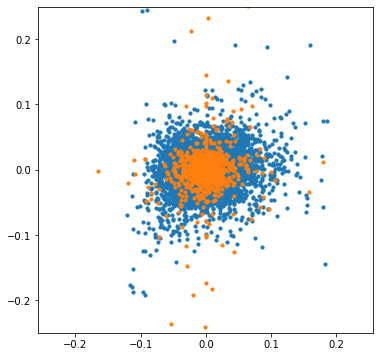

In [16]:
plt.figure(figsize=(6, 6))
plt.scatter(gen_t_copulaKDE.natural, gen_t_copulaKDE.gasoline, s=10)
plt.scatter(returns_test.natural, returns_test.gasoline, s=10)
plt.axis('equal')
plt.xlim(-0.25, 0.25)
plt.ylim(-0.25, 0.25)
plt.savefig('figs/gen_t_copulaKDE.png')
plt.show()

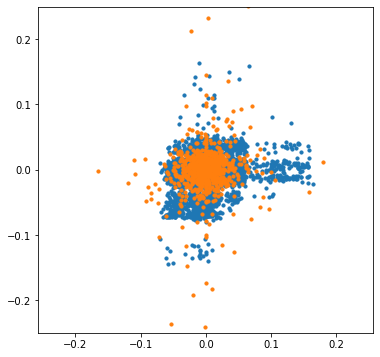

In [17]:
plt.figure(figsize=(6, 6))
plt.scatter(gen_tgan.natural, gen_tgan.gasoline, s=10)
plt.scatter(returns_test.natural, returns_test.gasoline, s=10)
plt.axis('equal')
plt.xlim(-0.25, 0.25)
plt.ylim(-0.25, 0.25)
plt.savefig('figs/gen_tgan.png')
plt.show()

# KS test

In [18]:
ks_res = {'gen': [], 'commodity': [], 'stat': [], 'p_val': []}

for col in returns_test.columns[:-1]:
    ks_test = ks_2samp(returns_test[col], gen_t_copula[col])
    ks_res['gen'].append('t_copula')
    ks_res['commodity'].append(col)
    ks_res['stat'].append(ks_test.statistic)
    ks_res['p_val'].append(round(ks_test.pvalue, 2))

for col in returns_test.columns[:-1]:
    ks_test = ks_2samp(returns_test[col], gen_t_copulaKDE[col])
    ks_res['gen'].append('t_copulaKDE')
    ks_res['commodity'].append(col)
    ks_res['stat'].append(ks_test.statistic)
    ks_res['p_val'].append(round(ks_test.pvalue, 2))
    
for col in returns_test.columns[:-1]:
    ks_test = ks_2samp(returns_test[col], gen_gbm[col])
    ks_res['gen'].append('gen_gbm')
    ks_res['commodity'].append(col)
    ks_res['stat'].append(ks_test.statistic)
    ks_res['p_val'].append(round(ks_test.pvalue, 2))
    
for col in returns_test.columns[:-1]:
    ks_test = ks_2samp(returns_test[col], gen_tgan[col])
    ks_res['gen'].append('gen_tgan')
    ks_res['commodity'].append(col)
    ks_res['stat'].append(ks_test.statistic)
    ks_res['p_val'].append(round(ks_test.pvalue, 2))

In [19]:
pd.DataFrame(ks_res).groupby(['gen']).mean()

,stat,p_val
gen,,
gen_gbm,0.123487,0.000000
gen_tgan,0.155816,0.000000
t_copula,0.106104,0.008333
t_copulaKDE,0.105704,0.001667


# Kullback–Leibler divergence

In [20]:
kl_div = {'gen': [], 'commodity': [], 'div': []}

for col in returns_test.columns[:-1]:
    min_val = min(min(returns_test[col]), min(gen_t_copula[col]))
    max_val = max(max(returns_test[col]), max(gen_t_copula[col]))
    range_val = (min_val, max_val)
    pdf_real = np.histogram(returns_test[col], density=True, bins=25, range=range_val)[0] + 0.0001
    pdf_gen = np.histogram(gen_t_copula[col], density=True, bins=25, range=range_val)[0] + 0.0001
    
    kl_div['gen'].append('t_copula')
    kl_div['commodity'].append(col)
    kl_div['div'].append(entropy(pdf_real, pdf_gen))

for col in returns_test.columns[:-1]:
    min_val = min(min(returns_test[col]), min(gen_t_copulaKDE[col]))
    max_val = max(max(returns_test[col]), max(gen_t_copulaKDE[col]))
    range_val = (min_val, max_val)
    pdf_real = np.histogram(returns_test[col], density=True, bins=25, range=range_val)[0] + 0.0001
    pdf_gen = np.histogram(gen_t_copulaKDE[col], density=True, bins=25, range=range_val)[0] + 0.0001
    
    kl_div['gen'].append('t_copulaKDE')
    kl_div['commodity'].append(col)
    kl_div['div'].append(entropy(pdf_real, pdf_gen))
    
for col in returns_test.columns[:-1]:
    min_val = min(min(returns_test[col]), min(gen_gbm[col]))
    max_val = max(max(returns_test[col]), max(gen_gbm[col]))
    range_val = (min_val, max_val)
    pdf_real = np.histogram(returns_test[col], density=True, bins=25, range=range_val)[0] + 0.0001
    pdf_gen = np.histogram(gen_gbm[col], density=True, bins=25, range=range_val)[0] + 0.0001
    
    kl_div['gen'].append('gbm')
    kl_div['commodity'].append(col)
    kl_div['div'].append(entropy(pdf_real, pdf_gen))
    
for col in returns_test.columns[:-1]:
    min_val = min(min(returns_test[col]), min(gen_tgan[col]))
    max_val = max(max(returns_test[col]), max(gen_tgan[col]))
    range_val = (min_val, max_val)
    pdf_real = np.histogram(returns_test[col], density=True, bins=25, range=range_val)[0] + 0.0001
    pdf_gen = np.histogram(gen_tgan[col], density=True, bins=25, range=range_val)[0] + 0.0001
    
    kl_div['gen'].append('gen_tgan')
    kl_div['commodity'].append(col)
    kl_div['div'].append(entropy(pdf_real, pdf_gen))

In [21]:
pd.DataFrame(kl_div).groupby(['gen']).sum()

,div
gen,
gbm,1.072346
gen_tgan,0.859741
t_copula,0.107627
t_copulaKDE,0.328768


# VaR

In [22]:
tolal = 100000

In [23]:
prices = pd.read_csv('data/prices.csv', index_col=0)
prices.iloc[2432]

brent        55.4900
crude        52.4200
gasoline      1.5702
heating       1.6459
gas         489.5000
natural       3.2040
Name: 2017-01-22, dtype: float64

In [24]:
weights = np.array([0.325, 0.375, 0.075, 0.045, 0.03, 0.15])

In [25]:
quantity = tolal * weights / prices.iloc[2432]
quantity

brent        585.691116
crude        715.375811
gasoline    4776.461597
heating     2734.066468
gas            6.128703
natural     4681.647940
Name: 2017-01-22, dtype: float64

In [26]:
portfolio_returns = returns_test[returns_test.columns[:-1]].values * [quantity]

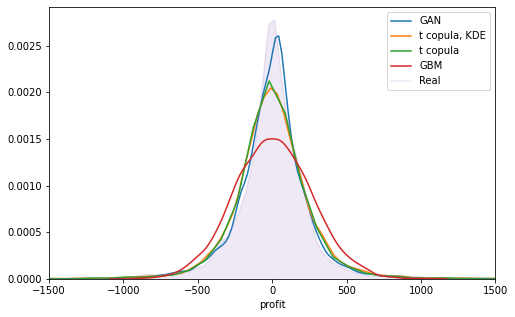

In [27]:
plt.figure(figsize=(8, 5))
tgan_portfolio = (gen_tgan[gen_tgan.columns[:-1]].values * [quantity]).sum(axis=1)
sns.distplot(
    tgan_portfolio, 
    label='GAN', 
    hist=False
)

t_copulaKDE_portfolio = (gen_t_copulaKDE[gen_t_copulaKDE.columns[:-1]].values * [quantity]).sum(axis=1)
sns.distplot(
    t_copulaKDE_portfolio,
    label='t copula, KDE', 
    hist=False
)

t_copula_portfolio = (gen_t_copula[gen_t_copula.columns[:-1]].values * [quantity]).sum(axis=1)
sns.distplot(
    t_copula_portfolio,
    label='t copula', 
    hist=False
)

gbm_portfolio = (gen_gbm[gen_gbm.columns[:-1]].values * [quantity]).sum(axis=1)
sns.distplot(
    gbm_portfolio, 
    label='GBM', 
    hist=False
)

real_portfolio =  portfolio_returns.sum(axis=1)
sns.distplot(
    real_portfolio,
    label='Real',
    kde_kws={"shade": True, 'alpha': 0.15},
    hist=False
)
plt.xlabel('profit')
plt.xlim(-1500, 1500)
plt.legend()
plt.savefig('figs/hists.png')
plt.show()

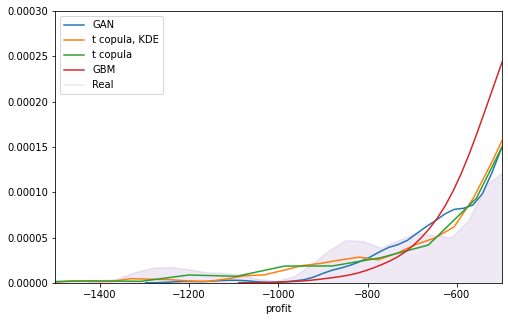

In [28]:
plt.figure(figsize=(8, 5))
tgan_portfolio = (gen_tgan[gen_tgan.columns[:-1]].values * [quantity]).sum(axis=1)
sns.distplot(
    tgan_portfolio, 
    label='GAN', 
    hist=False
)

t_copulaKDE_portfolio = (gen_t_copulaKDE[gen_t_copulaKDE.columns[:-1]].values * [quantity]).sum(axis=1)
sns.distplot(
    t_copulaKDE_portfolio,
    label='t copula, KDE', 
    hist=False
)

t_copula_portfolio = (gen_t_copula[gen_t_copula.columns[:-1]].values * [quantity]).sum(axis=1)
sns.distplot(
    t_copula_portfolio,
    label='t copula', 
    hist=False
)

gbm_portfolio = (gen_gbm[gen_gbm.columns[:-1]].values * [quantity]).sum(axis=1)
sns.distplot(
    gbm_portfolio, 
    label='GBM', 
    hist=False
)

real_portfolio =  portfolio_returns.sum(axis=1)
sns.distplot(
    real_portfolio,
    label='Real',
    kde_kws={"shade": True, 'alpha': 0.15},
    hist=False
)
plt.xlabel('profit')
plt.xlim(-1500, -500)
plt.ylim(0, 0.0003)
plt.legend()
plt.savefig('figs/tails.png')
plt.show()

In [29]:
real_var = np.quantile(real_portfolio, 0.05)
real_var

-374.3082417058009

In [30]:
gbm_var = np.quantile(gbm_portfolio, 0.05)
gbm_var

-417.41693531416803

In [31]:
t_copula_var = np.quantile(t_copula_portfolio, 0.05)
t_copula_var

-385.1770718203418

In [32]:
t_copulaKDE_var = np.quantile(t_copulaKDE_portfolio, 0.05)
t_copulaKDE_var

-390.1864971043034

In [33]:
tgan_var = np.quantile(tgan_portfolio, 0.05)
tgan_var

-377.76169451443235

# CVaR

In [34]:
real_portfolio[np.where(real_portfolio < real_var)].mean()

-682.2953253105917

In [35]:
gbm_portfolio[np.where(gbm_portfolio < gbm_var)].mean()

-530.1003317521568

In [36]:
t_copula_portfolio[np.where(t_copula_portfolio < t_copula_var)].mean()

-627.1436525681845

In [37]:
t_copulaKDE_portfolio[np.where(t_copulaKDE_portfolio < t_copulaKDE_var)].mean()

-581.1833945271717

In [38]:
tgan_portfolio[np.where(tgan_portfolio < tgan_var)].mean()

-529.8416439047882